# Data Loading 

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
%matplotlib inline

In [2]:
train = pd.read_csv('../titanic/train (2).csv', index_col=["PassengerId"])
test = pd.read_csv('../titanic/test (2).csv', index_col=["PassengerId"])

#### one-hot encoding
    - x Embarked_s Embarked_C Q
    - 출입구, 이름(Mr, Mrs, Miss, Master)

# 데이터 전처리
- 성별 인코딩

In [3]:
train.loc[train["Sex"]=="male", "Sex_encode"] = 0
train.loc[train["Sex"]=="female", "Sex_encode"] = 1
train[["Sex", "Sex_encode"]].head(10)

,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0
6,male,0.0
7,male,0.0
8,male,0.0
9,female,1.0


In [4]:
test.loc[test["Sex"]=="male", "Sex_encode"] = 0
test.loc[test["Sex"]=="female", "Sex_encode"] = 1
test[["Sex", "Sex_encode"]].head(10)

,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0
897,male,0.0
898,female,1.0
899,male,0.0
900,female,1.0


In [5]:
test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [6]:
mean_fare = train["Fare"].mean()
print("Fare의 평균값은 = {0:3f}".format(mean_fare))

Fare의 평균값은 = 32.204208


In [7]:
train.loc[pd.isnull(train["Fare"]), "Fare"] = mean_fare
test.loc[pd.isnull(test["Fare"]), "Fare"] = mean_fare

# One-Hot-Encoding

In [8]:
train_embarked = pd.get_dummies(train["Embarked"], prefix = "Embarked")
train_embarked.head(10)

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
6,0,1,0
7,0,0,1
8,0,0,1
9,0,0,1


In [9]:
train = pd.concat([train, train_embarked], axis=1) #옆으로 붙이면 ax = 1 , 밑으로 붙이면 ax = 0 여러번 실행 금지

In [10]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0,0,1
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.0,0,1,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.0,0,0,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.0,0,0,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1.0,0,0,1


In [11]:
test_embarked = pd.get_dummies(test["Embarked"], prefix = "Embarked")
test_embarked.head(10)
test = pd.concat([test, test_embarked], axis=1)

In [12]:
test.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,0,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,0,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,0,0,1
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0.0,0,0,1
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1.0,0,1,0
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0.0,0,0,1
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1.0,1,0,0


# Train 

In [13]:
feature_names = ["Sex_encode", "Pclass", "Embarked_C", "Embarked_Q", "Embarked_S", "Fare"] #나중에 여기만 추가 삭제하면 됨

In [14]:
X_train = train[feature_names]
X_train

,Sex_encode,Pclass,Embarked_C,Embarked_Q,Embarked_S,Fare
PassengerId,,,,,,
1,0.0,3,0,0,1,7.2500
2,1.0,1,1,0,0,71.2833
3,1.0,3,0,0,1,7.9250
4,1.0,1,0,0,1,53.1000
5,0.0,3,0,0,1,8.0500
6,0.0,3,0,1,0,8.4583
7,0.0,1,0,0,1,51.8625
8,0.0,3,0,0,1,21.0750
9,1.0,3,0,0,1,11.1333


In [15]:
X_test = test[feature_names]
X_test

,Sex_encode,Pclass,Embarked_C,Embarked_Q,Embarked_S,Fare
PassengerId,,,,,,
892,0.0,3,0,1,0,7.8292
893,1.0,3,0,0,1,7.0000
894,0.0,2,0,1,0,9.6875
895,0.0,3,0,0,1,8.6625
896,1.0,3,0,0,1,12.2875
897,0.0,3,0,0,1,9.2250
898,1.0,3,0,1,0,7.6292
899,0.0,2,0,0,1,29.0000
900,1.0,3,1,0,0,7.2292


In [16]:
y_train = train["Survived"]

# 모델생성 

In [17]:
from sklearn.tree import DecisionTreeClassifier
seed = 0
model = DecisionTreeClassifier(max_depth=5, random_state=seed)

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [21]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, feature_names=feature_names,
               class_names=["Perish", "Survivied"], out_file="decision-tree.dot")
with open("decision-tree.dot") as f :
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

# predict 

In [22]:
prediction = model.predict(X_test)
prediction[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

# Submit 

In [24]:
submisseion = pd.read_csv('../titanic/gender_submission (2).csv', index_col=["PassengerId"])

In [25]:
submisseion["Survived"] = prediction
submisseion.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [26]:
submisseion.to_csv("titanic_Submission.csv")

# Count Plot 

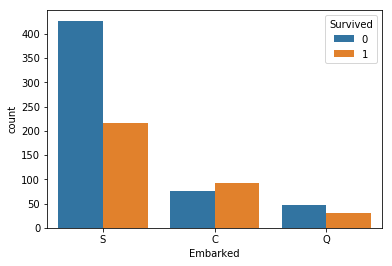

In [35]:
sns.countplot(data=train, x="Embarked", hue="Survived")

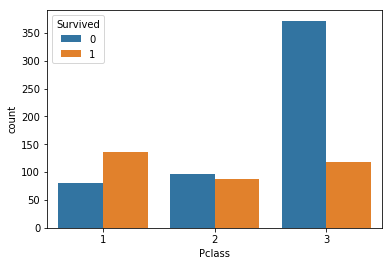

In [37]:
sns.countplot(data=train, x="Pclass", hue="Survived")

C:\Users\163908\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


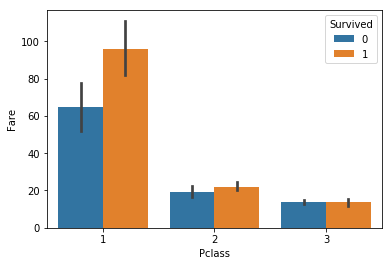

In [38]:
sns.barplot(data=train, x="Pclass", y="Fare", hue="Survived")

# DistPlot

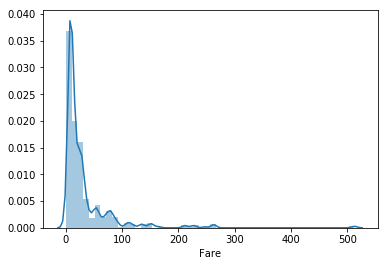

In [44]:
sns.distplot(train["Fare"], hist=True) #hist False일 경우 막대 그래프가 보이지 않음

In [45]:
ignore_high_fare = train[train["Fare"]<100]
ignore_high_fare

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0,0,1
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.0,0,1,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.0,0,0,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.0,0,0,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1.0,0,0,1


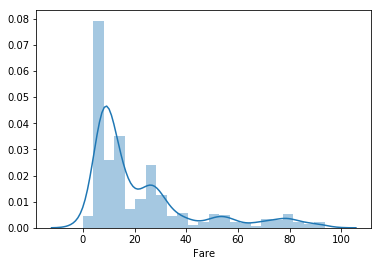

In [47]:
sns.distplot(ignore_high_fare["Fare"], hist = True)

한쪽(<40)으로 몰려있음

In [48]:
perish = ignore_high_fare[ignore_high_fare["Survived"]==0]
survived = ignore_high_fare[ignore_high_fare["Survived"]==1]

C:\Users\163908\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


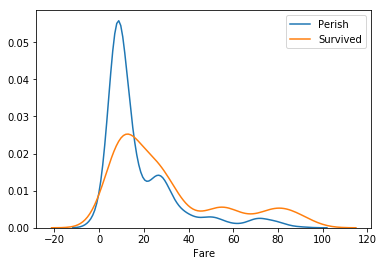

In [50]:
sns.distplot(perish["Fare"], hist= False, label="Perish")
sns.distplot(survived["Fare"], hist= False, label="Survived")

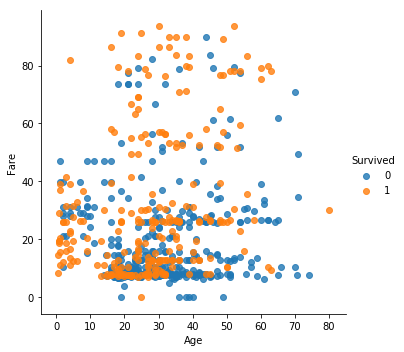

In [51]:
sns.lmplot(data=ignore_high_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

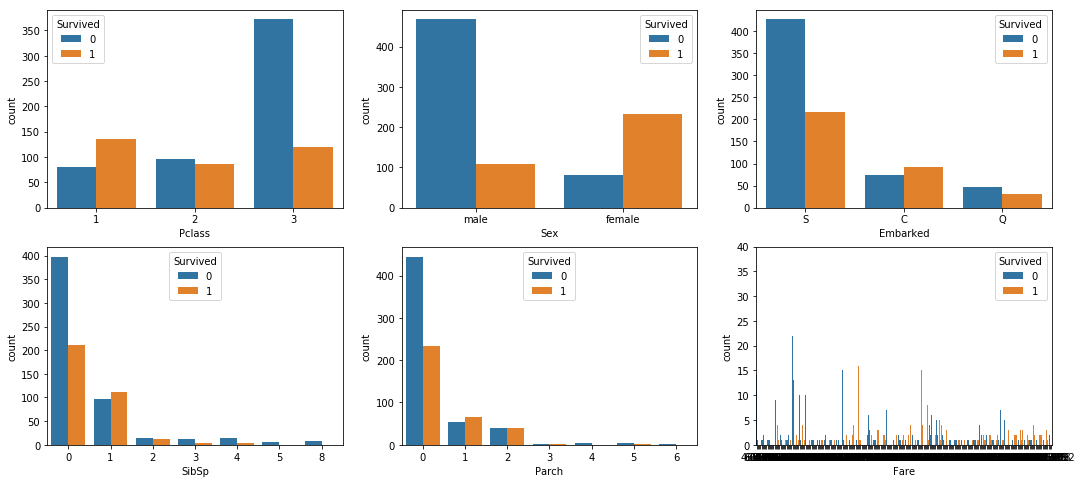

In [54]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(18, 8)

sns.countplot(data=train, x ="Pclass", hue= "Survived", ax=ax1)
sns.countplot(data=train, x ="Sex", hue= "Survived", ax=ax2)
sns.countplot(data=train, x ="Embarked", hue= "Survived", ax=ax3)
sns.countplot(data=train, x ="SibSp", hue= "Survived", ax=ax4) # 1명이랑 같이 왔냐. 2명 0명 등 나머지는 따지지 않게
sns.countplot(data=train, x ="Parch", hue= "Survived", ax=ax5) # 1명이랑 같이 왔냐. 배 혼자 타지 마요
sns.countplot(data=train, x ="Fare", hue= "Survived", ax=ax6)

In [57]:
def find_title(name) :
    return name.split(",")[1].split(".")[0]
train["Title"] = train["Name"].apply(find_title)
train[["Name", "Title"]].head(10)

,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
6,"Moran, Mr. James",Mr
7,"McCarthy, Mr. Timothy J",Mr
8,"Palsson, Master. Gosta Leonard",Master
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs


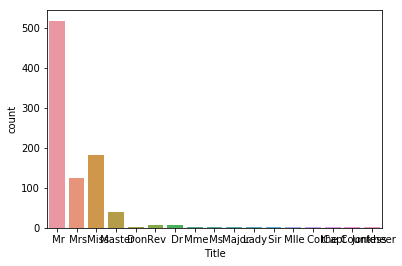

In [58]:
sns.countplot(data=train, x="Title")